# Exercise sheet 4 (Wed 29 Sept, graded)

Some general remarks about the exercises:
* For your convenience the functions from the lecture are included below. Feel free to reuse them without copying to the exercise solution box.
* For each part of the exercise a single solution box has been added, but you may insert additional boxes above or below using `Insert > Insert cell above / below`. Do not hesitate to add Markdown boxes for textual or LaTeX answers (via `Cell > Cell Type > Markdown`).
* Please make your code readable by humans (and not just by the Python interpreter): choose informative function and variable names and use consistent formatting. Feel free to check the [PEP 8 Style Guide for Python](https://www.python.org/dev/peps/pep-0008/) for the widely adopted coding conventions or [this guide for explanation](https://realpython.com/python-pep8/).
* Make sure that the full notebook runs without errors before submitting your work. This you can do by selecting `Kernel > Restart & Run All` in the jupyter menu.
* This exercise sheet __will be graded__. The maximal number of points is **10** and a subdivision of these points for each exercise is indicated. Please submit your completed notebook before __Wednesday 6 Oct 10:30__ by saving the notebook to your local computer via `File > Download as > Notebook (.ipynb)` and uploading it to the appropriate Brightspace Assignment.
* If you have submitted your solutions in time and your grade is below a 7.0, you have the option to resubmit your solutions within a week, so before Wednesday 13 Oct 10:30. Then they will be regraded, but with a cap of 7.0 on the grade.

### Functions from the lecture

In [11]:
import numpy as np
import matplotlib.pylab as plt
import networkx as nx

rng = np.random.default_rng()
%matplotlib inline

def draw_transition_graph(P):
    # construct a directed graph directly from the matrix
    graph = nx.DiGraph(P)        
    # draw it in such a way that edges in both directions are visible and have appropriate width
    nx.draw_networkx(graph,connectionstyle='arc3, rad = 0.15',width=[6*P[u,v] for u,v in graph.edges()])

def sample_next(P,current):
    return rng.choice(len(P),p=P[current])

def sample_chain(P,start,n):
    chain = [start]
    for _ in range(n):
        chain.append(sample_next(P,chain[-1]))
    return chain

def stationary_distributions(P):
    eigenvalues, eigenvectors = np.linalg.eig(np.transpose(P))
    # make list of normalized eigenvectors for which the eigenvalue is very close to 1
    return [eigenvectors[:,i]/np.sum(eigenvectors[:,i]) for i in range(len(eigenvalues)) 
              if np.abs(eigenvalues[i]-1) < 1e-10]

## 4.1 Markov Chain on a graph (5 Points)

The goal of this exercise is to use Metropolis-Hastings to sample a uniform vertex in a (finited, undirected) connected graph $G$. More precisely, the state space $\Gamma = \{0,\ldots,n-1\}$ is the set of vertices of a graph and the desired probability mass function is $\pi(x) = 1/n$ for $x\in\Gamma$. The set of edges is denoted $E = \{ \{x_1,y_1\}, \ldots,\{x_k,y_k\}\}$, $x_i,y_i\in\Gamma$, and we assume that there are no edges connecting a vertex with itself ($x_i\neq y_i$) and there is at most one edge between any pair of vertices. The **neighbors** of a vertex $x$ are the vertices $y\neq x$ such that $\{x,y\}\in E$. The **degree** $d_x$ of a vertex $x$ is its number of neighbours. An example is the following graph:

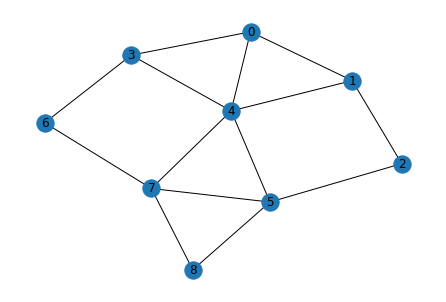

In [14]:
edges = [(0,1),(1,2),(0,3),(1,4),(2,5),(3,4),(4,5),(3,6),(4,7),(5,8),(6,7),(7,8),(5,7),(0,4)]
graph = nx.Graph(edges)
nx.draw(graph,with_labels=True)

A natural proposal transition matrix is $Q(x \to y) = \frac{1}{d_x} \mathbf{1}_{\{\{x,y\}\in E\}}$. In other words, when at $x$ the proposed next state is chosen uniformly among its neighbors.

__(a)__ Write a function that, given a graph and $x$, samples $y$ according to transition matrix $Q(x \to y)$. _Hint_: a useful Graph member function is [`neighbors`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html).

In [72]:
def sample_proposal(graph,x):
    # code here
    return # y

__(b)__ Let us consider the Markov chain corresponding to the transition matrix $Q(x \to y)$. Produce a histogram of the states visited in the first ~20000 steps. Compare this to the exact stationary distribution found by the function `stationary_distributions` from the lecture applied to the transition matrix $Q$. _Hint_: another useful Graph member function is [`degree`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).

In [71]:
def chain_Q_histogram(graph,start,n):
    # code to produce histogram of MC started at start for n steps
    return # histogram

def trans_matr_Q(graph):
    # code to produce matrix Q
    return # matrix

# plot

__(c)__ Determine the appropriate Metropolis-Hastings acceptance probability $A(x \to y)$ 
and write a function that, given a graph and $x$, samples the next state with $y$ according to the Metropolis-Hastings transition matrix $P(x \to y)$.

In [73]:
def sample_next_state(graph,x):
    # code to produce next state
    return # next state

__(d)__ Do the same as in part (b) but now for the Markov chain corresponding to $P$. Verify that the histogram of the Markov chain approaches a flat distribution and corroborate this by calculating the explicit matrix $P$ and applying `stationary_distributions` to it. _Hint_: for determining the explicit matrix $P(x\to y)$, remember that the formula $P(x\to y) = Q(x\to y)A(x\to y)$ only holds for $x\neq y$. What is $P(x\to x)$?

In [74]:
def chain_P_histogram(graph,start,n):
    # code to produce histogram of MC started at start for n steps
    return # histogram

def trans_matr_P(graph):
    # code to produce matrix P
    return # matrix

# plot

## 4.2 MCMC simulation of disk model (5 Points)

Recall that in the disk model we would like to sample the positions $x = (x_1,y_1,\ldots,x_N,y_N)\in [0,L)^{2N}$ of $N$ disks of radius $1$ in the torus $[0,L)^2$ with uniform density $\pi(x) = \mathbf{1}_{\{\text{all pairwise distance }\geq 2\}}(x) / Z$, where $Z$ is the unknown partition function of the model. For the purposes of this simulation we will store the state $x$ in a `np.array` of dimension $(N,2)$ with values in $[0,1)$. Such a configuration can be conveniently plotted using the following function:

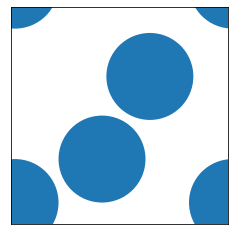

In [52]:
def plot_disk_configuration(positions,L):
    fig,ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_ylim(0,L)
    ax.set_xlim(0,L)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])
    for x,y in positions:
        # consider all horizontal and vertical copies that may be visible
        for x_shift in [z for z in x + [-L,0,L] if -1<z<L+1]:
            for y_shift in [z for z in y + [-L,0,L] if -1<z<L+1]:
                ax.add_patch(plt.Circle((x_shift,y_shift),1))
    plt.show()
    
# Example with N=3 and L=5
positions = np.array([[0.1,0.5],[2.1,1.5],[3.2,3.4]])
plot_disk_configuration(positions,5)

__(a)__ Assuming $N \leq (L/2)^2$, write a function that produces a non-overlapping initial condition. Make sure the given test cases succeed.

In [88]:
def generate_initial_positions(N,L):
    # code here
    return # an np.array of dimensions (N,2) containing center coordinates
    
plot_disk_configuration(generate_initial_positions(33,14.5),14.5)
plot_disk_configuration(generate_initial_positions(20,11.3),11.3)
plot_disk_configuration(generate_initial_positions(35,12.5),12.5)

__(b)__ Write a function that determines whether in a non-overlapping configuration $x$ moving the $i$th particle to $(x_i',y_i')$ results in a non-overlapping configuration.

In [ ]:
def remains_valid_after_move(x,i,next_position):
    # code here
    return # True or False?

__(c)__ Implement the Metropolis-Hastings transition by selecting a uniformly chosen disk and displacing it by a reflection-symmetric two-dimensional random variable. You may choose an appropriate distribution, but keep the typical range $\delta$ of the move as a parameter (in view of the part (d)). Test run your simulation for $L=11.3$ and $N=20$ and about $20000$ Markov chain steps and plot the final state.

In [77]:
def MH_disk_move(x,L,delta):
    # code to update positions x according to MH
    

# plot

__(d)__ As we have seen in the first exercise set, a decent choice for the range $\delta$ is often given by the $1/2$-rule, i.e. one for which roughly half of the moves are accepted. Use this rule to determine a decent value of $\delta$ for the $L=11.3$ and $N=20$ simulation.

In [78]:
# code here

## Feedback

Please use the following Google form to give anonymous and constructive feedback on the lecture and/or these exercises. This is an easy way to contribute to improving the course: https://forms.gle/MW8WW6z66o62TkzT7